C:\Users\AGP KOHAT\AppData\Local\Temp\ipykernel_12568\2368213088.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Imputation complete!
Using 31 numeric features for regression
R² Score: 0.3923507639216328
MSE: 0.0027746010060476748


C:\Users\AGP KOHAT\AppData\Local\Temp\ipykernel_12568\2368213088.py:84: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AGP KOHAT\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


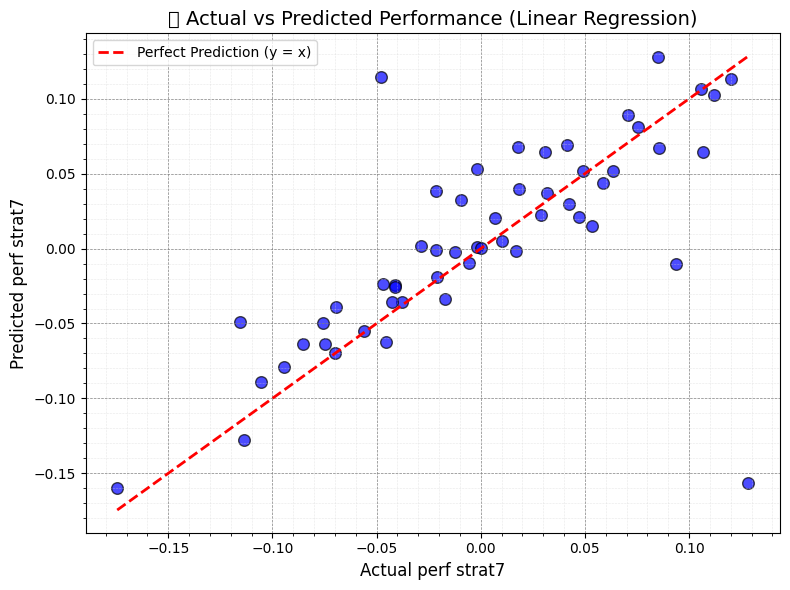

In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error




df = pd.read_csv('Comparison Long Only vs Trend follow new.csv')


df.columns = df.columns.str.strip().str.lower()


df = df.replace(',', '.', regex=True)
df = df.apply(pd.to_numeric, errors='ignore')



columns_to_impute = [
    'perf strat7', 'pos strat 7', 'perf strat9', 'pos strat 9',
    'strat 7 not reinvested', 'strat 7 reinvested',
    'perf month corr', 'perf month init',
    'long only reinvested', 'long only not reinvested'
]

columns_to_impute = [c for c in columns_to_impute if c in df.columns]

for col in columns_to_impute:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

imputer = KNNImputer(n_neighbors=5)
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

print("Imputation complete!")



y = df['perf strat7']

X = df.drop(columns=['perf strat7'])


X = X.select_dtypes(include=[np.number])

print(f"Using {X.shape[1]} numeric features for regression")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# Compare actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', s=70, alpha=0.7)

# Line of perfect prediction (y = x)
lims = [
    np.min([y_test.min(), y_pred.min()]),
    np.max([y_test.max(), y_pred.max()])
]
plt.plot(lims, lims, 'r--', linewidth=2, label='Perfect Prediction (y = x)')

# Aesthetic "graph paper" style
plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', color='lightgray', linestyle=':', linewidth=0.4)

plt.xlabel('Actual perf strat7', fontsize=12)
plt.ylabel('Predicted perf strat7', fontsize=12)
plt.title('📈 Actual vs Predicted Performance (Linear Regression)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
X

,date,cl1,cl2,roll coef,day of month,roll last month,is end of month,date,month close,roll coef,...,trading cost,unnamed: 25,pos aver7 aver9,perf aver7 aver9,aver7 aver9 reinvested,aver7 aver9 not reinvested,0,0.1,trading cost .1,0.2
0,1/2/1985,25.92,25.81,-0.004244,1,0.000000,0,1/31/2000,27.64,-0.036395,...,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000
1,1/3/1985,25.84,25.79,-0.001935,2,0.000000,0,2/29/2000,30.43,-0.032727,...,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000
2,1/4/1985,25.18,25.19,0.000397,3,0.000000,0,3/31/2000,26.90,-0.062165,...,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000
3,1/7/1985,25.56,25.60,0.001565,4,0.000000,0,4/28/2000,25.74,-0.048494,...,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000
4,1/8/1985,25.48,25.51,0.001177,5,0.000000,0,5/31/2000,29.01,-0.007765,...,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1/17/1986,23.55,22.60,-0.040340,12,-0.051292,0,10/29/2021,83.57,-0.006641,...,0.100960,1.869054,1,0.117677,0,2.299436,0,0.000359,0.035421,2.264015
262,1/20/1986,21.27,21.60,0.015515,13,-0.051292,0,11/30/2021,66.18,-0.013616,...,0.100960,1.667606,1,-0.201448,0,2.097988,0,0.000453,0.035421,2.062567
263,1/21/1986,20.59,20.81,0.010685,14,-0.051292,0,12/31/2021,75.21,-0.002969,...,0.103874,1.514630,1,0.150062,0,2.248050,0,0.000399,0.035421,2.212628
264,1/22/1986,20.39,20.28,-0.005395,15,-0.051292,0,1/31/2022,88.15,-0.006204,...,0.106817,1.686708,1,0.175021,0,2.423070,0,0.000340,0.035421,2.387649


In [ ]:
y


0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
261    0.117677
262   -0.201448
263   -0.150062
264    0.175021
265    0.092080
Name: perf strat7, Length: 266, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)



In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)




from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_test,y_test)


y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("R^2 Score:", r2_score(y_test,y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))


ValueError: could not convert string to float: '9/20/1985'